# Coffee and Productivity

Does coffee consumption in a population correlate with higher productivity as measured in GDP per hour worked?

Background: On an individual level, consumption of coffee and its active ingredient, caffeine (a stimulant), is associated with higher levels of “energy” and “productivity”. But in a given population, such as a nation-state, does higher coffee consumption indicate a higher level of productivity? 


In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode()

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load ()
country_data_location_to_load = "data/data_map.csv"
coffee_data_to_load = "data/project_data.csv"
per_capita_coffee_data_to_load = "data/project_data_with_percapita_consumption.csv"

# Read the Data
country_data_location_df = pd.read_csv(country_data_location_to_load)
coffee_data = pd.read_csv(coffee_data_to_load)
per_capita_coffee_data = pd.read_csv(per_capita_coffee_data_to_load)

plt.rcParams["figure.figsize"] = 16,9


In [43]:
colors = ["rgb(120,200,80)",
"rgb(240,128,48)",
"rgb(104,144,240)",
"rgb(168,184,32)",
"rgb(168,168,120)",
"rgb(160,64,160)",
"rgb(248,208,48)",
"rgb(224,192,104)",
"rgb(238,153,172)",
"rgb(192,48,40)",
"rgb(248,88,136)",
"rgb(184,160,56)",
"rgb(112,88,152)",
"rgb(152,216,216)",
"rgb(112,56,248)",
"rgb(111,87,201)",
"rgb(119,154,169)",
"rgb(233,152,55)",
"rgb(168,184,32)",
"rgb(168,168,120)",
"rgb(160,64,160)",
"rgb(0,128,0)",
"rgb(128,128,0)",
"rgb(0,255,0)",
"rgb(192,192,192)",
"rgb(255,255,0)",
"rgb(0,128,128)",
"rgb(0,0,255)",
"rgb(255,0,0)"
         ]


In [4]:
# Store latitude and longitude in locations
locations = country_data_location_df[["Country","latitude", "longitude","Average of Coffee Consumed per Capita in Kg", \
                                      "code","gdp_per_hour_worked ($)"]].astype(str)

# Convert to string
avg_consumption = country_data_location_df["Average of Coffee Consumed per Capita in Kg"].astype(str)

avg_coffee_consumption_ctry = round(per_capita_coffee_data.groupby(["Country Name", "Year"])["Coffee Consumed per Capita in Kg"].mean(),2)

avg_coffee_consumption = per_capita_coffee_data.groupby(["Year","Coffee Consumed per Capita in Kg"]).mean()



In [5]:
# Create text for map rollovers

locations["text_cons"] = "Country: "+ locations["Country"] + "<br>" + \
        "Avg Coffee Consumed per Capita(Kg): " + locations["Average of Coffee Consumed per Capita in Kg"]  

locations["text_gdp"] = "Country: "+ locations["Country"] + "<br>" + \
        "GDP per Hour Worked ($): " + locations["gdp_per_hour_worked ($)"] 

In [9]:
# Create interactive maps to show coffee consumption per capita (kg)

data = [dict(
        type = "choropleth", 
        locations=locations["code"],
        colorscale="custom-colorscale", 
        z = locations["Average of Coffee Consumed per Capita in Kg"],
        text = locations["text_cons"],
        autocolorscale = False,
        #reversescale = True,
        marker = dict(
            line = dict(
            color = "rgb(29,30,30)", 
            width = 1
              )),
        colorbar = dict(
                title = "(kg)"))]

        
layout = dict(
            title="Average Coffee Consumed per Capita (kg)",
            titlefont = dict(size=25),
            zoom = "1",
            opacity = 0,
            geo = dict(
                scope="world",
                showlegend = True,
                showframe = False,
                showcoastlines = True,
                showcountries= True,
                projection = dict(
                type = "natural earth"),
                showland = True,
                landcolor = "rgb(247, 247, 247)",
                  )
            )
            
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename = "avg_consumption_world")



In [10]:
# Create interactive maps to show coffee consumption per capita (kg), just Europe
data = [dict(
        type = "choropleth", 
        locations=locations["code"],
        colorscale="custom-colorscale", 
        z = locations["Average of Coffee Consumed per Capita in Kg"],
        text = locations["text_cons"],
        autocolorscale = False,
        marker = dict(
            line = dict(
            color = "rgb(29,30,30)", 
            width = 1
              )),
        colorbar = dict(
                title = "(kg)"))]
  
    
layout = dict(
            #showlegend = True,
            title="Average Coffee Consumed per Capita (kg) - Europe",
            titlefont = dict(size=25),
            zoom = "1",
            opacity = 0,
            geo = dict(
                
                scope="europe",
                showlegend = True,
                showframe = False,
                showcoastlines = True,
                showcountries= True,
                projection = dict(
                type = "natural earth"),
                showland = True,
                landcolor = "rgb(247, 247, 247)",
                                    )
            )
            
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename = "avg_consumption_europe")




In [11]:
# Create interactive maps to show GDP per hour worked ($) - World
data = [dict(
        type = "choropleth", 
        locations=locations["code"],
        colorscale="custom-colorscale", 
        z = locations["gdp_per_hour_worked ($)"],
        text = locations["text_gdp"],
        autocolorscale = False,
        #reversescale = True,
        marker = dict(
            line = dict(
            color = "rgb(29,30,30)", 
            width = 1
              )),
            colorbar = dict(
                title = "GDP ($)"))]
  
    
layout = dict(
            #showlegend = True,
            title="Average GDP per Hour Worked ($) - Worldwide",
            titlefont = dict(size=25),
            zoom = "1",
            geo = dict(
                lat = "60.472024",
                lon = "8.468946",
                scope="world",
                showlegend = True,
                showframe = False,
                showcoastlines = True,
                showcountries= True,
                projection = dict(
                type = "natural earth"),
                showland = True,
                landcolor = "rgb(247, 247, 247)",
                                    )
            )
            
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename = "gdp_world")

In [49]:
# Create interactive maps to show GDP per hour worked ($) - Europe
data = [dict(
        type = "choropleth", 
        locations=locations["code"],
        colorscale="custom-colorscale", 
        z = locations["gdp_per_hour_worked ($)"],
        text = locations["text_gdp"],
        autocolorscale = False,
        #reversescale = True,
        marker = dict(
            line = dict(
            color = "rgb(29,30,30)", 
            width = 1
              )),
            colorbar = dict(
                title = "GDP ($)"))]
    
    
layout = dict(
            title="Average GDP per Hour Worked ($) - Europe",
            titlefont = dict(size=25),
            zoom = "1",
            geo = dict(
                lat = "60.472024",
                lon = "8.468946",
                scope="europe",
                showlegend = True,
                showframe = True,
                showcoastlines = True,
                showcountries= True,
                projection = dict(
                type = "natural earth"),
                showland = True,
                landcolor = "rgb(247, 247, 247)",
                )
            )
            
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename = "gdp_europe")

<a href="https://plot.ly/~mosleykc/21
" target="_blank"><img src="https://github.com/mosleykc/Confabulators_Project_1/blob/final_merge/images/gdp_europe.PNG" 
alt="Click here to go to the interactive Average GDP per Hour Worked - Europe map" width="240" height="180" border="10" /></a>


## 1-1. World Coffee Consumption by Year: Does World Consume More Coffee Over Time?


In [50]:
# Build out DataFrames to be used in graph

coffee_consumption_by_ctry_per_capita = per_capita_coffee_data[["Country Name","Year","Coffee Consumed per Capita in Kg"]]

coffee_consumption_pivot_per_capita = coffee_consumption_by_ctry_per_capita.pivot(index="Year", columns="Country Name", \
                                                                                  values="Coffee Consumed per Capita in Kg")

avg_coffee_consumption_data = coffee_consumption_pivot_per_capita.mean(axis=1)

year = per_capita_coffee_data.iloc[:,1].unique()

#avg_cofee_consumption_data.head(15)

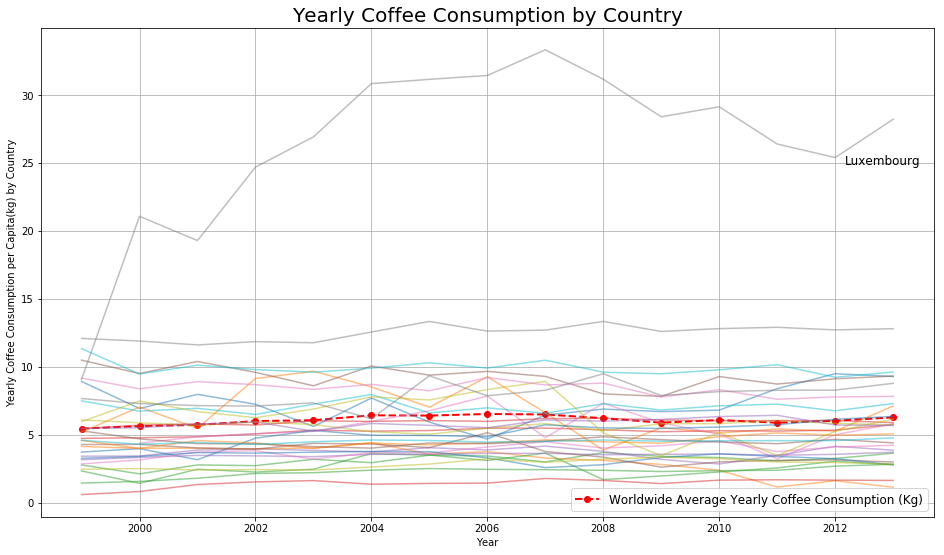

In [51]:
# Create line graph to illlustrate the combined mean coffee consumption by year graph with consumption graph by country

# Create figure with subplots
figure, ax = plt.subplots(figsize=(16,9))

# Plot line for average worldwide consumption
ax.plot(year, avg_coffee_consumption_data, linewidth=2, marker="o", color = "r", linestyle = "--", \
        label = "Worldwide Average Yearly Coffee Consumption (Kg)")

# Plot individual country lines
ax.plot(coffee_consumption_pivot_per_capita, alpha = .5)

# Add legend for avg worldwide consumption
legend1 = ax.legend(loc='lower right', fontsize='large')

# Add text to highlight outlier country
ax.text(.9, .74, "Luxembourg", transform=ax.transAxes, fontsize=12,
        verticalalignment='top')

# Add title and x,y labels
plt.title("Yearly Coffee Consumption by Country",{"fontsize":20})
plt.ylabel("Yearly Coffee Consumption per Capita(kg) by Country")
plt.xlabel("Year")
plt.grid()
# Print and save graph
plt.show()
#plt.savefig(coffee_consumption_per_capita)
